In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data_2019=pd.read_csv('LokSabha2019.csv')
data_2014=pd.read_csv('LokSabha2014.csv')
data_2009=pd.read_csv('LokSabha2009.csv')


In [4]:

data_2009['year'] = 2009
data_2014['year'] = 2014
data_2019['year'] = 2019

In [5]:
data = pd.concat([data_2009, data_2014, data_2019])


In [6]:
data.shape

(24372, 11)

In [7]:
data.head()


,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Constituency,Liabilities,Winner,Gender,year
0,Shri Bishnu Pada Ray,BJP,1,Graduate,59,1241034.0,Andaman & Nicobar Islands,0,0.0,M,2009
1,Shri P. R. Ganeshan,RJD,0,Not Given,71,329563.0,Andaman & Nicobar Islands,0,0.0,M,2009
2,Shri Pradeep Kumar Ekka,JDP,0,Others,37,410000.0,Andaman & Nicobar Islands,0,0.0,M,2009
3,Shri T. Ali,IND,0,12th Pass,37,445957.0,Andaman & Nicobar Islands,296000,0.0,M,2009
4,Shri Tapan Kumar Bepari,CPM,0,Post Graduate,52,3986000.0,Andaman & Nicobar Islands,0,0.0,M,2009


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24372 entries, 0 to 7967
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Candidate       24372 non-null  object 
 1   Party           24372 non-null  object 
 2   Criminal Cases  24372 non-null  int64  
 3   Education       24372 non-null  object 
 4   Age             24372 non-null  int64  
 5   Total Assets    23817 non-null  float64
 6   Constituency    24372 non-null  object 
 7   Liabilities     24372 non-null  int64  
 8   Winner          24372 non-null  float64
 9   Gender          24372 non-null  object 
 10  year            24372 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 2.2+ MB


In [9]:
data['year'].value_counts()

2014    8484
2019    7968
2009    7920
Name: year, dtype: int64

In [10]:
data['Gender'].value_counts()

M    23315
F     1057
Name: Gender, dtype: int64

In [16]:
data['Age'].replace(0,np.nan,inplace=True)
data['Age'].isnull().sum()
data['Age'].fillna(data['Age'].mean,inplace=True)
data['Age'].isnull().sum()

0

In [12]:
#1. Youngest Candidate who participated in Lok Sabha Election?
#2. Candidate with Highest number of Criminal Cases
#3.Parties with total number of criminal cases.
#4.Education of each candidate.(graph)
#5.City with highest criminal cases
#6.Sort the data based upon number of criminal cases.
#7.2009 Election -- City With Most Criminal Cases
#8.Create a plot with education degree distribution


In [27]:
#1. Youngest Candidate who participated in Lok Sabha Election?
#data['Candidate'].loc[data["Age"].min()]
data['Age'].min()

TypeError: '<=' not supported between instances of 'float' and 'method'

In [40]:
#2. Candidate with Highest number of Criminal Cases
data['Candidate'].loc[data['Criminal Cases']==382]
#data['Criminal Cases'].max()

5714    Udayakumar S.P.
Name: Candidate, dtype: object

Udayakumar s.p. has maximum Crimninal Cases

In [51]:
#3.Parties with total number of criminal cases.

data.groupby(['Party'])['Criminal Cases'].sum()



Party
A-Chik National Congress(Democratic)       0
AAP                                      928
AARAKSHAN VIRODHI PARTY                    2
ABHM                                      10
AD                                         7
                                        ... 
Yuva Jan Jagriti Party                     0
Yuva Krantikari Party                      0
Yuva Sarkar                                0
Yuva Vikas Party                           0
Yuvajana Sramika Rythu Congress Party     28
Name: Criminal Cases, Length: 1253, dtype: int64

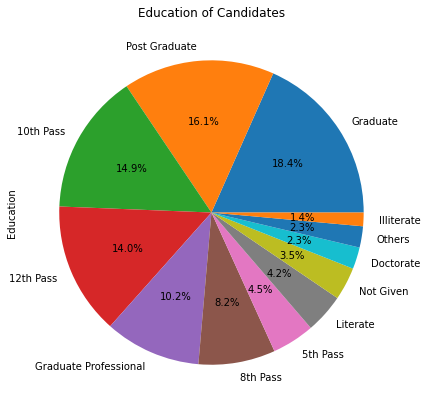

In [80]:
#4.Education of each candidate.(graph)
#data["Education"].value_counts()
plt.figure(figsize=(7,7))
data["Education"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Education of Candidates')
plt.show()

In [97]:
#5.City with highest criminal cases
data['Constituency'].loc[data['Criminal Cases'].max()]

382    Narsapuram
382        DHUBRI
382       Gauhati
Name: Constituency, dtype: object

In [98]:
#6.Sort the data based upon number of criminal cases.
data['Criminal Cases'].sort_values()

4265      0
7449      0
7448      0
7447      0
7446      0
       ... 
7432     59
2818    204
2908    240
6056    380
5714    382
Name: Criminal Cases, Length: 24372, dtype: int64

In [99]:
#7.2009 Election -- City With Most Criminal Cases
data['Constituency'].loc[(data['year']==2009) & (data['Criminal Cases'])].max()

'Zahirabad'

C:\Users\eshwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


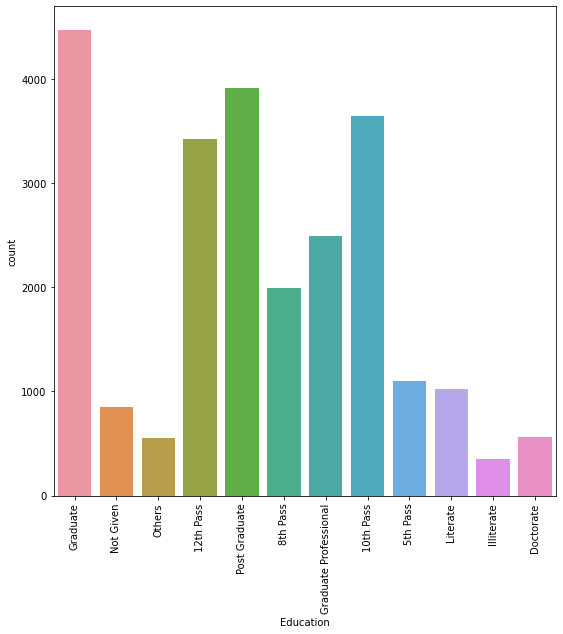

In [103]:
#8.Create a plot with education degree distribution
plt.figure(figsize=(9,9))
sns.countplot('Education',data=data)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

In [96]:
data['Education'].value_counts()

Graduate                 4473
Post Graduate            3917
10th Pass                3642
12th Pass                3423
Graduate Professional    2490
8th Pass                 1989
5th Pass                 1102
Literate                 1022
Not Given                 850
Doctorate                 563
Others                    549
Illiterate                352
Name: Education, dtype: int64